In [5]:
from notebook_environment import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
gene_x_kras_isogenic_and_imortalized_celllines = ccal.read_gct(
    '../data/kras_isogenic_and_imortalized_celllines.gct')

gene_x_kras_isogenic_and_imortalized_celllines.index.name = 'Gene'
gene_x_kras_isogenic_and_imortalized_celllines.columns.name = 'Cellline'

Computing match score with <function compute_information_coefficient at 0x7fb0cfd3aae8> (28 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 2 permutations ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


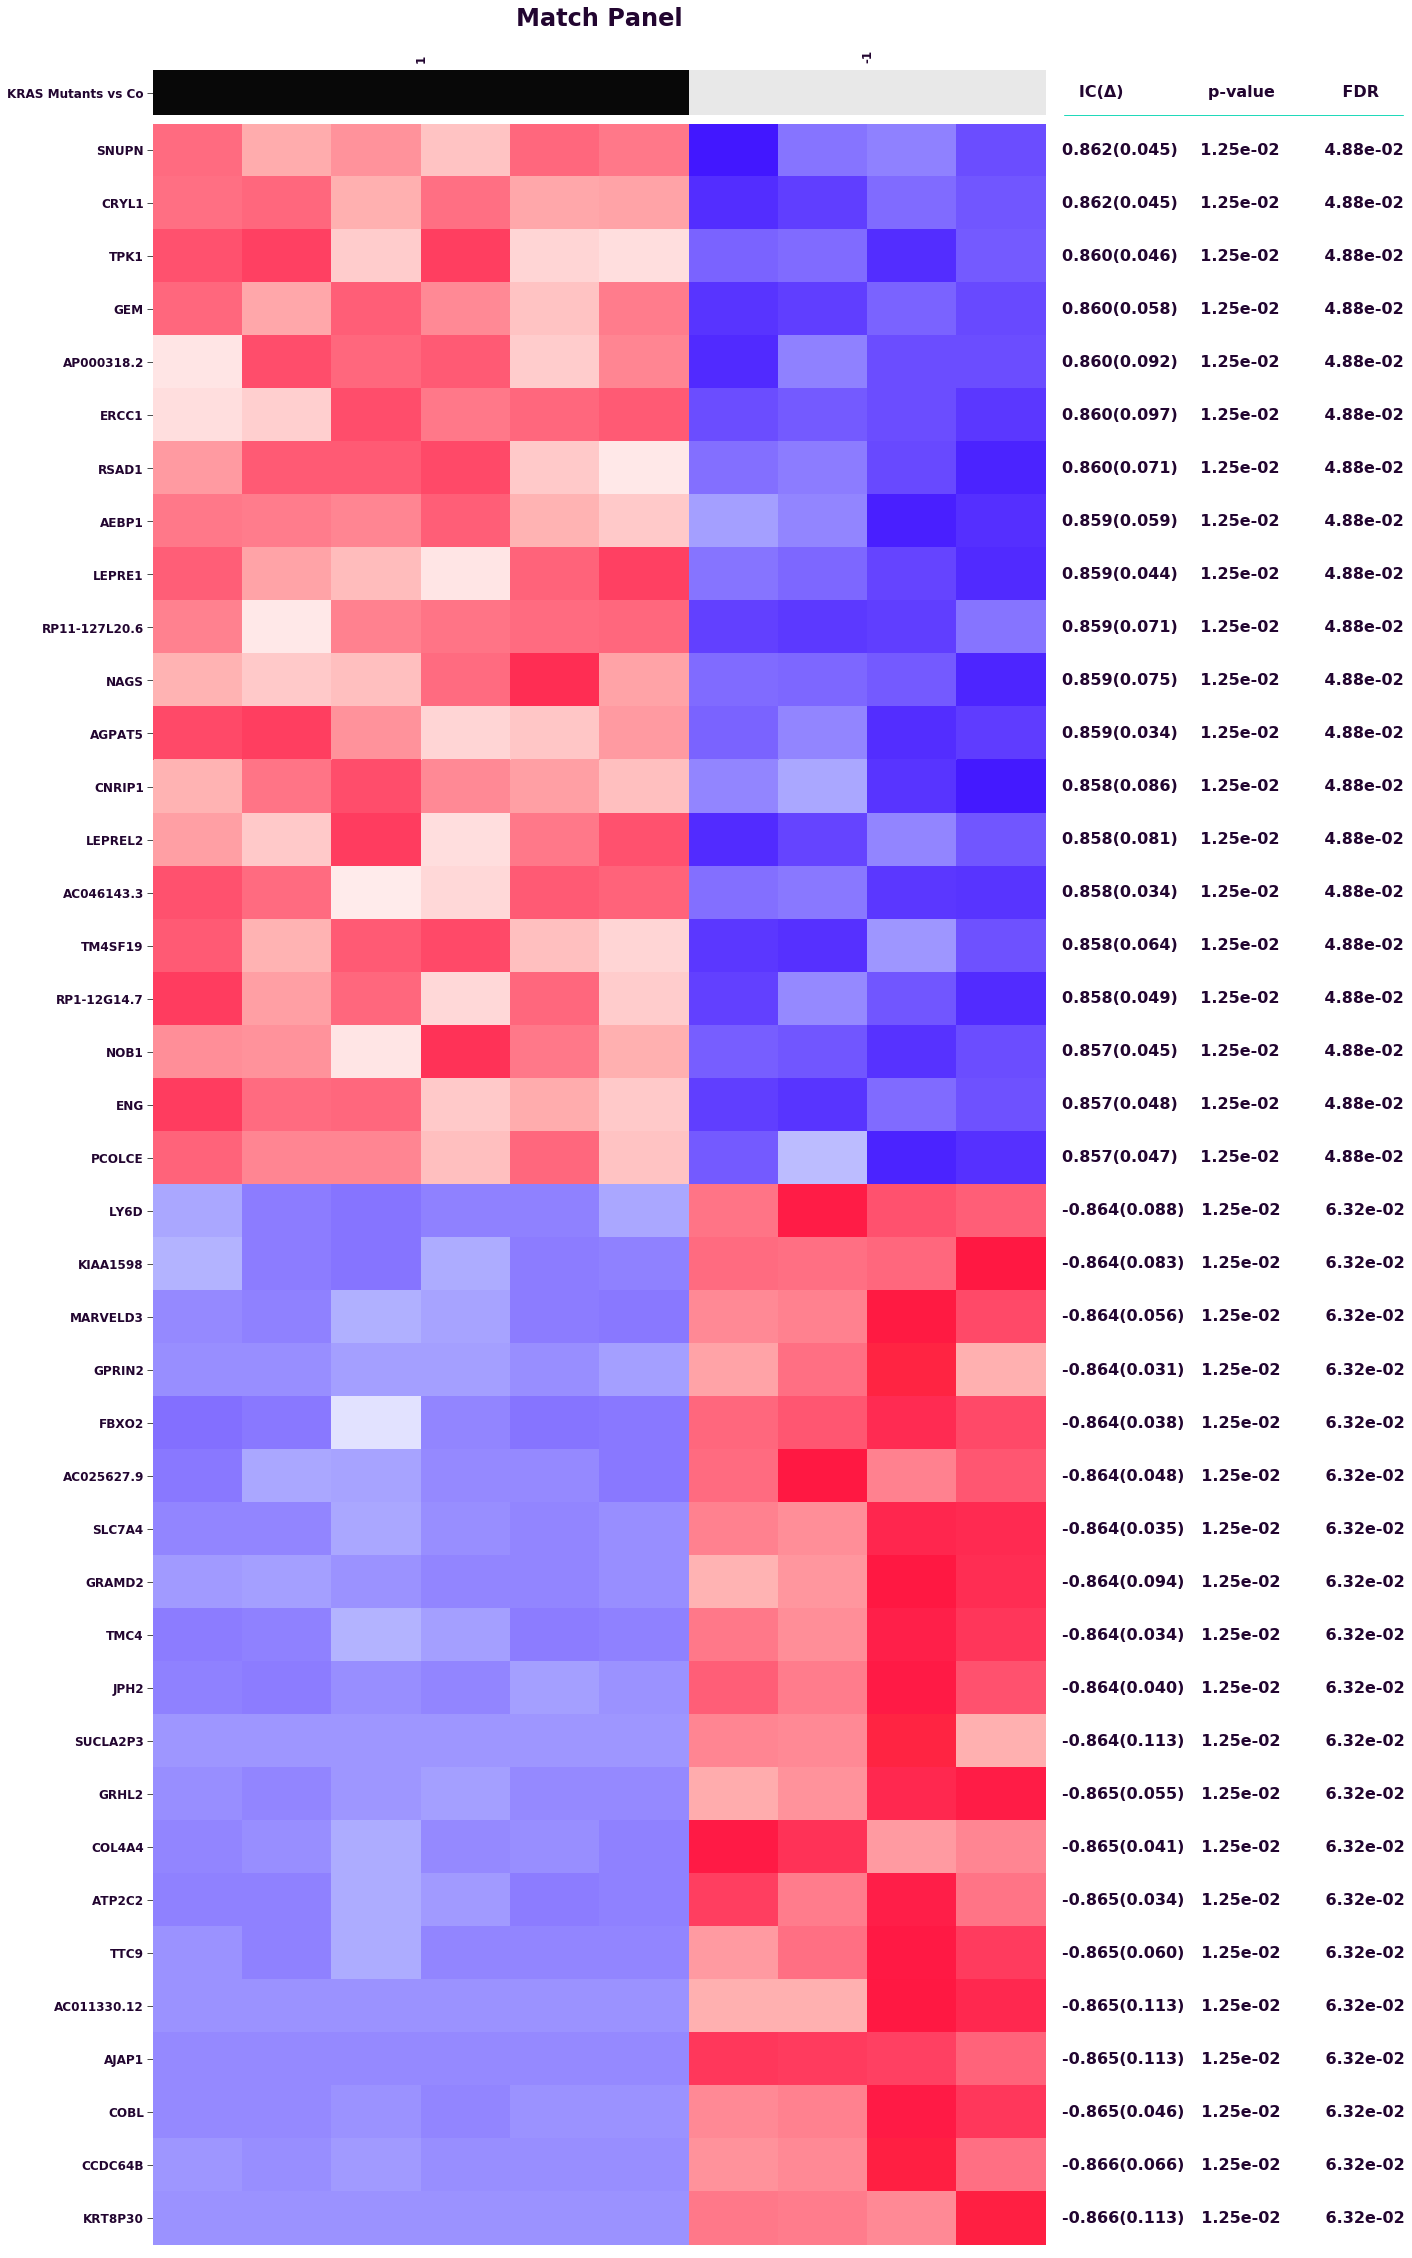

In [8]:
target = pd.Series(
    [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    name='KRAS Mutants vs Controls',
    index=gene_x_kras_isogenic_and_imortalized_celllines.columns)

sys.setrecursionlimit(sys.getrecursionlimit())

gene_scores = ccal.make_match_panel(
    target,
    gene_x_kras_isogenic_and_imortalized_celllines,
    n_jobs=28,
    n_features=20,
    n_permutations=2,
    #     n_permutations=200,
    random_seed=12345,
    target_type='binary',
    file_path_prefix='../results/kras_isogenic_and_imortalized_celllines')

/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


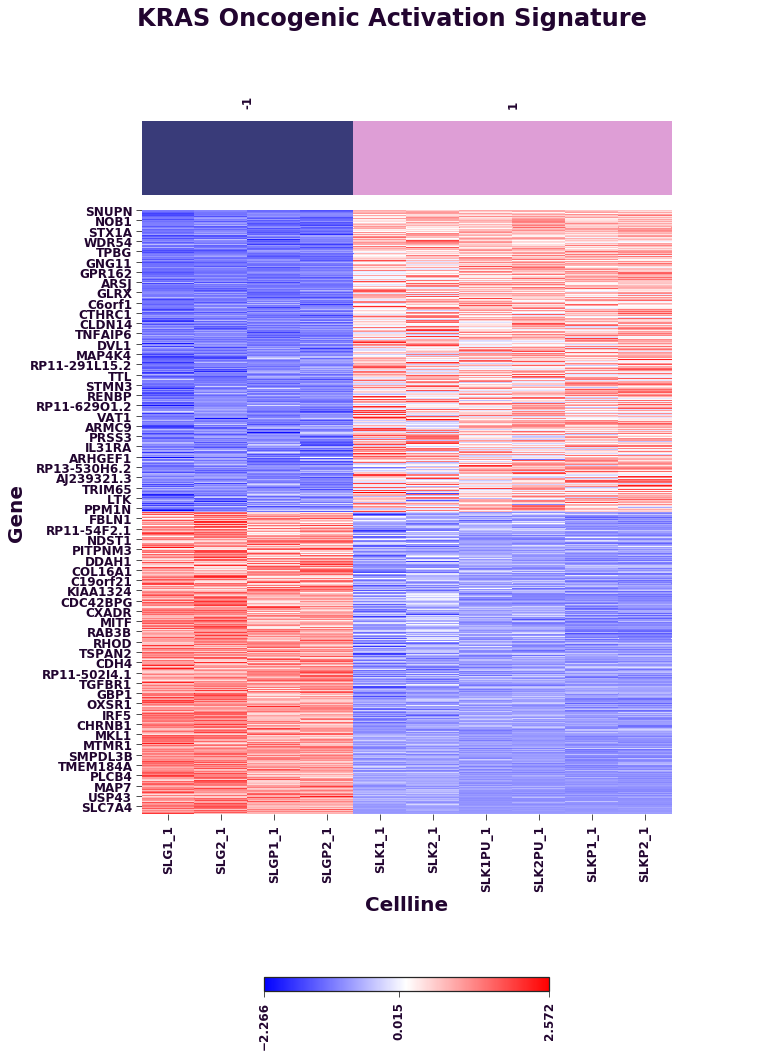

In [13]:
kras_relevant_genes = ccal.get_top_and_bottom_series_indices(
    gene_scores['Score'], 500).to_series()

kras_relevant_genes.to_csv('../results/kras_relevant_genes.txt', index=False)

ccal.plot_heatmap(
    gene_x_kras_isogenic_and_imortalized_celllines.loc[kras_relevant_genes, :],
    figure_size=(16, 16),
    normalization_axis=1,
    normalization_method='-0-',
    xticklabels=True,
    column_annotation=[1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    title='KRAS Oncogenic Activation Signature')